# Hospital Patient Records

- Gabriel Borges

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('data/hospital data analysis.csv')

display(df.info())
print(f"Original dataset shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


None

Original dataset shape: (984, 10)


In [27]:
# Filter for female patients only (maternity focus)
df = df[df['Gender'] == 'Female']

# Drop not useful columns
df = df.drop(columns=['Cost'])
df = df.drop(columns=['Patient_ID'])

print(f"Removed {df.shape[0]} male patients, ID and Cost column for maternity analysis")

Removed 524 male patients, ID and Cost column for maternity analysis


## 1. Dataset Overview

Basic information about our maternity-focused patient records dataset (Female patients only).

In [28]:
display(df.head())

display(df.info())

print("\nBasic Statistics:")
display(df.describe())

,Age,Gender,Condition,Procedure,Length_of_Stay,Readmission,Outcome,Satisfaction
0,45,Female,Heart Disease,Angioplasty,5,No,Recovered,4
2,32,Female,Fractured Arm,X-Ray and Splint,1,No,Recovered,5
4,50,Female,Cancer,Surgery and Chemotherapy,10,No,Recovered,4
6,55,Female,Appendicitis,Appendectomy,4,No,Recovered,3
8,70,Female,Heart Attack,Cardiac Catheterization,8,Yes,Stable,2


<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 982
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             524 non-null    int64 
 1   Gender          524 non-null    object
 2   Condition       524 non-null    object
 3   Procedure       524 non-null    object
 4   Length_of_Stay  524 non-null    int64 
 5   Readmission     524 non-null    object
 6   Outcome         524 non-null    object
 7   Satisfaction    524 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 36.8+ KB


None


Basic Statistics:


,Age,Length_of_Stay,Satisfaction
count,524.000000,524.000000,524.000000
mean,51.900763,37.715649,3.681298
std,13.851220,19.552089,0.852145
min,30.000000,1.000000,2.000000
25%,42.500000,21.000000,3.000000
50%,53.000000,38.000000,4.000000
75%,60.000000,54.250000,4.000000
max,78.000000,76.000000,5.000000


In [24]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\n" + "="*50)
print("\nUnique values in categorical columns:")
categorical_cols = ['Condition', 'Procedure', 'Readmission', 'Outcome']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

Missing values in each column:
Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64


Unique values in categorical columns:

Condition: 8 unique values
Condition
Heart Attack     67
Fractured Arm    66
Cancer           66
Appendicitis     66
Heart Disease    65
Name: count, dtype: int64

Procedure: 8 unique values
Procedure
Cardiac Catheterization     67
X-Ray and Splint            66
Surgery and Chemotherapy    66
Appendectomy                66
Angioplasty                 65
Name: count, dtype: int64

Readmission: 2 unique values
Readmission
No     294
Yes    230
Name: count, dtype: int64

Outcome: 2 unique values
Outcome
Recovered    328
Stable       196
Name: count, dtype: int64


## 2. Demographic Analysis

Analyzing female patient demographics and age distributions for maternity care.

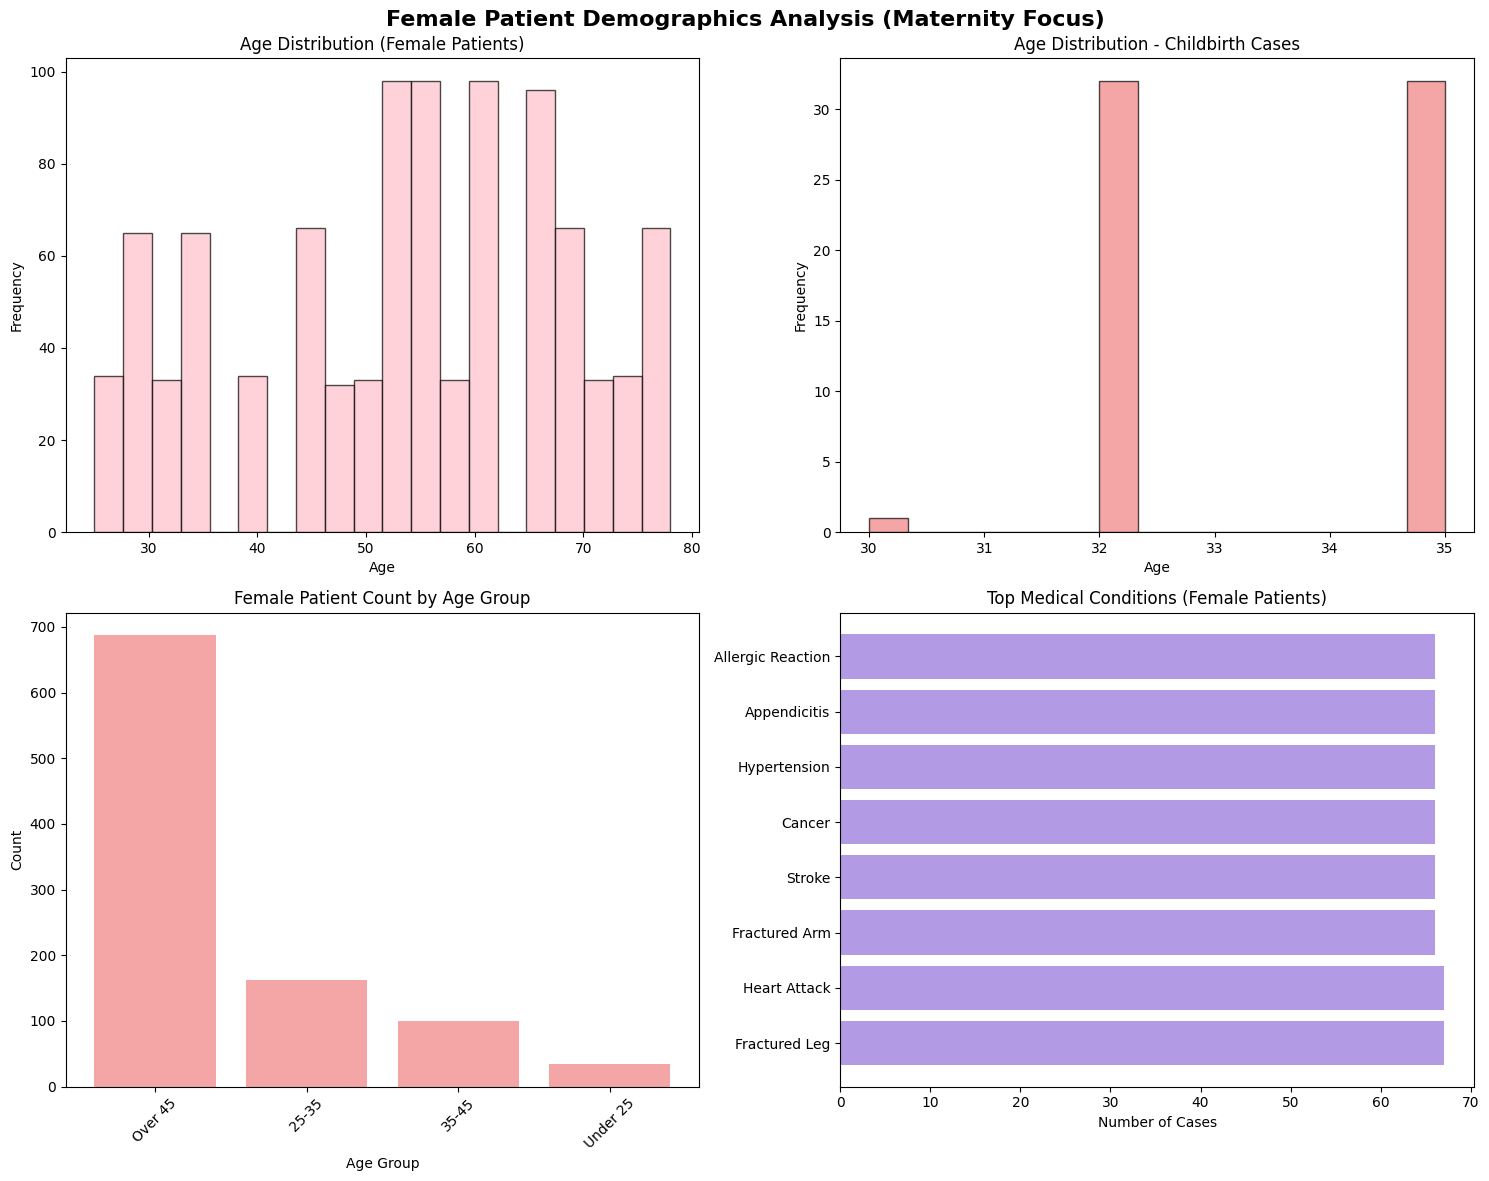

Average age (female patients): 53.8 years
Age range (female patients): 25 - 78 years
Total female patients: 984
Childbirth cases: 65


In [18]:
# Create subplots for demographic analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Female Patient Demographics Analysis (Maternity Focus)', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, color='pink', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Age Distribution (Female Patients)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Conditions relevant to maternity
maternity_conditions = df[df['Condition'].str.contains('Childbirth|Pregnancy', case=False, na=False)]
if len(maternity_conditions) > 0:
    axes[0, 1].hist(maternity_conditions['Age'], bins=15, color='lightcoral', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Age Distribution - Childbirth Cases')
    axes[0, 1].set_xlabel('Age')
    axes[0, 1].set_ylabel('Frequency')
else:
    axes[0, 1].text(0.5, 0.5, 'No specific childbirth\ncases identified', 
                   ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12)
    axes[0, 1].set_title('Childbirth Cases')

# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 100], labels=['Under 25', '25-35', '35-45', 'Over 45'])
age_group_counts = df['Age_Group'].value_counts()
axes[1, 0].bar(age_group_counts.index, age_group_counts.values, color='lightcoral', alpha=0.7)
axes[1, 0].set_title('Female Patient Count by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Top conditions for female patients
top_female_conditions = df['Condition'].value_counts().head(8)
axes[1, 1].barh(top_female_conditions.index, top_female_conditions.values, color='mediumpurple', alpha=0.7)
axes[1, 1].set_title('Top Medical Conditions (Female Patients)')
axes[1, 1].set_xlabel('Number of Cases')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"Average age (female patients): {df['Age'].mean():.1f} years")
print(f"Age range (female patients): {df['Age'].min()} - {df['Age'].max()} years")
print(f"Total female patients: {len(df)}")
childbirth_cases = len(df[df['Condition'].str.contains('Childbirth', case=False, na=False)])
print(f"Childbirth cases: {childbirth_cases}")

## 3. Medical Conditions Analysis

Exploring medical conditions specific to female patients and maternity-related care.

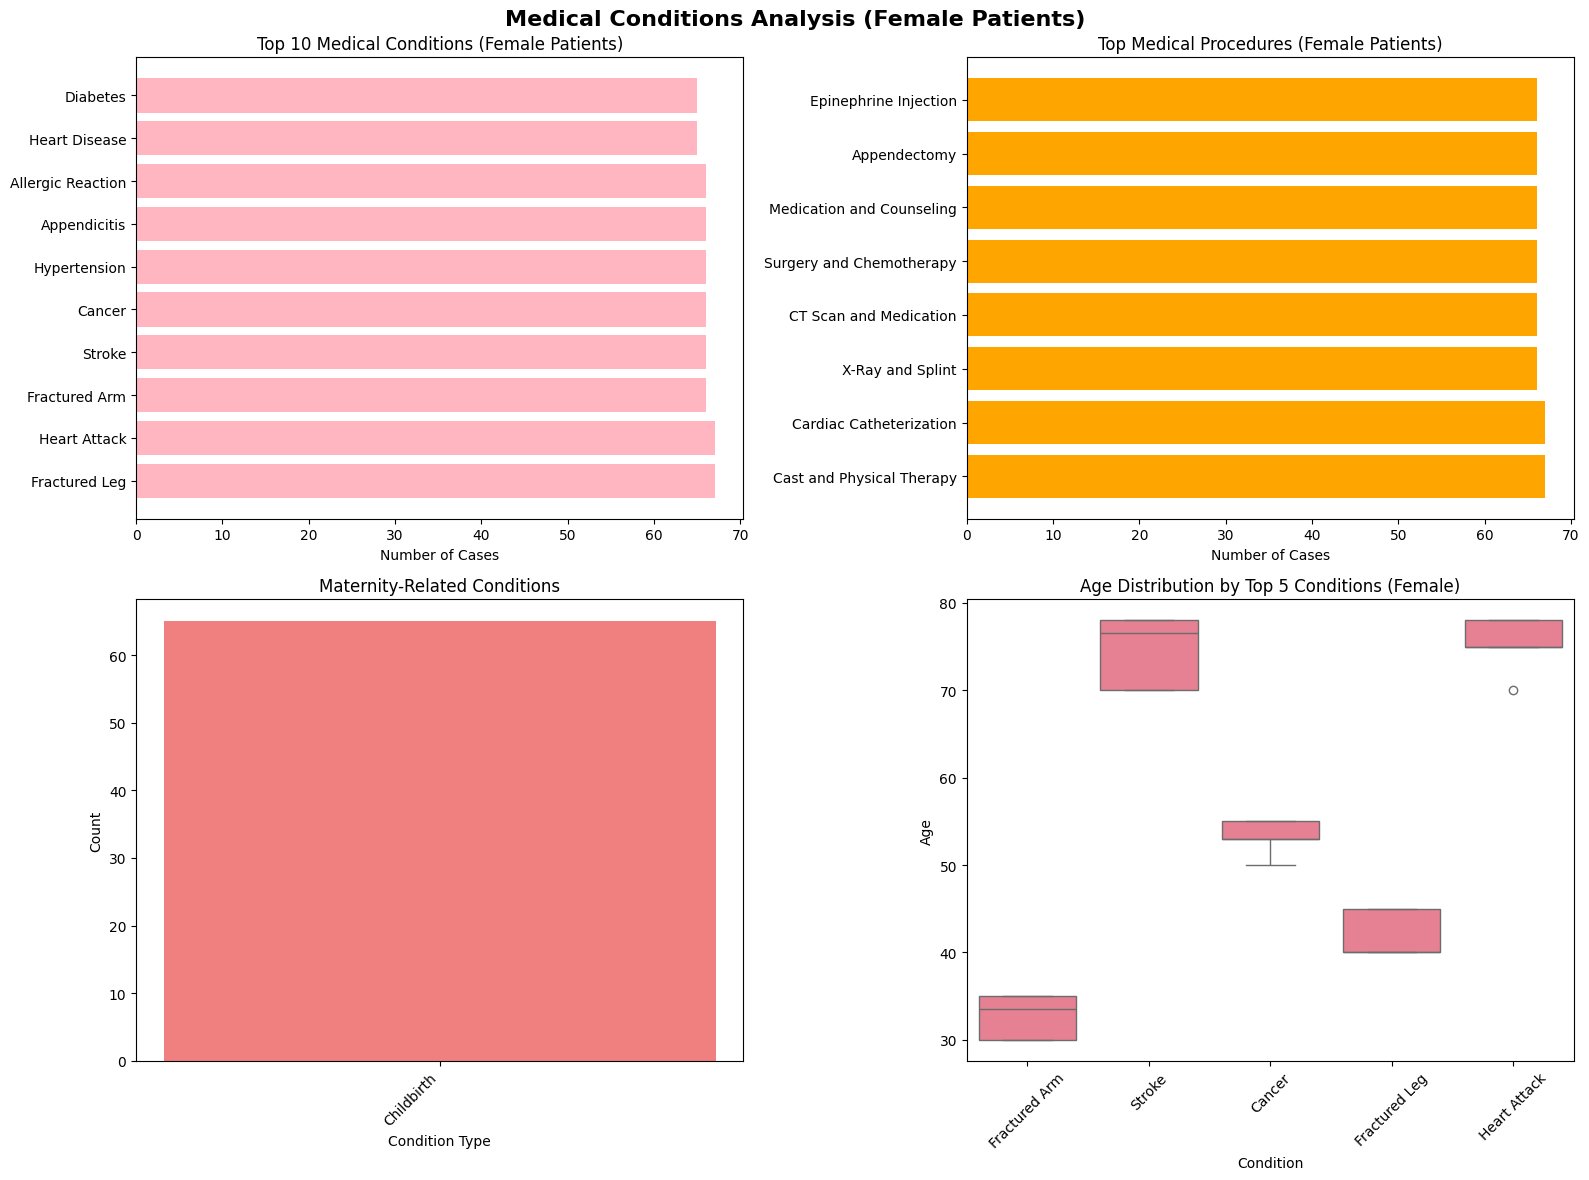

Total unique conditions (female patients): 15
Total unique procedures (female patients): 15
Most common condition: Fractured Leg (67 cases)
Maternity-related cases: 65


In [20]:
# Medical conditions analysis for female patients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Medical Conditions Analysis (Female Patients)', fontsize=16, fontweight='bold')

# Top conditions
condition_counts = df['Condition'].value_counts()
axes[0, 0].barh(condition_counts.head(10).index, condition_counts.head(10).values, color='lightpink')
axes[0, 0].set_title('Top 10 Medical Conditions (Female Patients)')
axes[0, 0].set_xlabel('Number of Cases')

# Procedures distribution
procedure_counts = df['Procedure'].value_counts()
axes[0, 1].barh(procedure_counts.head(8).index, procedure_counts.head(8).values, color='orange')
axes[0, 1].set_title('Top Medical Procedures (Female Patients)')
axes[0, 1].set_xlabel('Number of Cases')

# Maternity-related conditions
maternity_keywords = ['Childbirth', 'Pregnancy', 'Delivery', 'Postnatal']
maternity_related = df[df['Condition'].str.contains('|'.join(maternity_keywords), case=False, na=False)]
if len(maternity_related) > 0:
    maternity_counts = maternity_related['Condition'].value_counts()
    axes[1, 0].bar(range(len(maternity_counts)), maternity_counts.values, color='lightcoral')
    axes[1, 0].set_title('Maternity-Related Conditions')
    axes[1, 0].set_xlabel('Condition Type')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(maternity_counts)))
    axes[1, 0].set_xticklabels(maternity_counts.index, rotation=45, ha='right')
else:
    axes[1, 0].text(0.5, 0.5, 'No specific maternity\nconditions identified\nin current dataset', 
                   ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
    axes[1, 0].set_title('Maternity-Related Conditions')

# Age distribution by top conditions
top_5_conditions = condition_counts.head(5).index
df_top_conditions = df[df['Condition'].isin(top_5_conditions)]
sns.boxplot(data=df_top_conditions, x='Condition', y='Age', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Top 5 Conditions (Female)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Total unique conditions (female patients): {df['Condition'].nunique()}")
print(f"Total unique procedures (female patients): {df['Procedure'].nunique()}")
print(f"Most common condition: {condition_counts.index[0]} ({condition_counts.iloc[0]} cases)")
maternity_cases = len(maternity_related) if 'maternity_related' in locals() else 0
print(f"Maternity-related cases: {maternity_cases}")

## 4. Length of Stay Analysis

Analyzing hospital stay durations for female patients and maternity-related procedures.

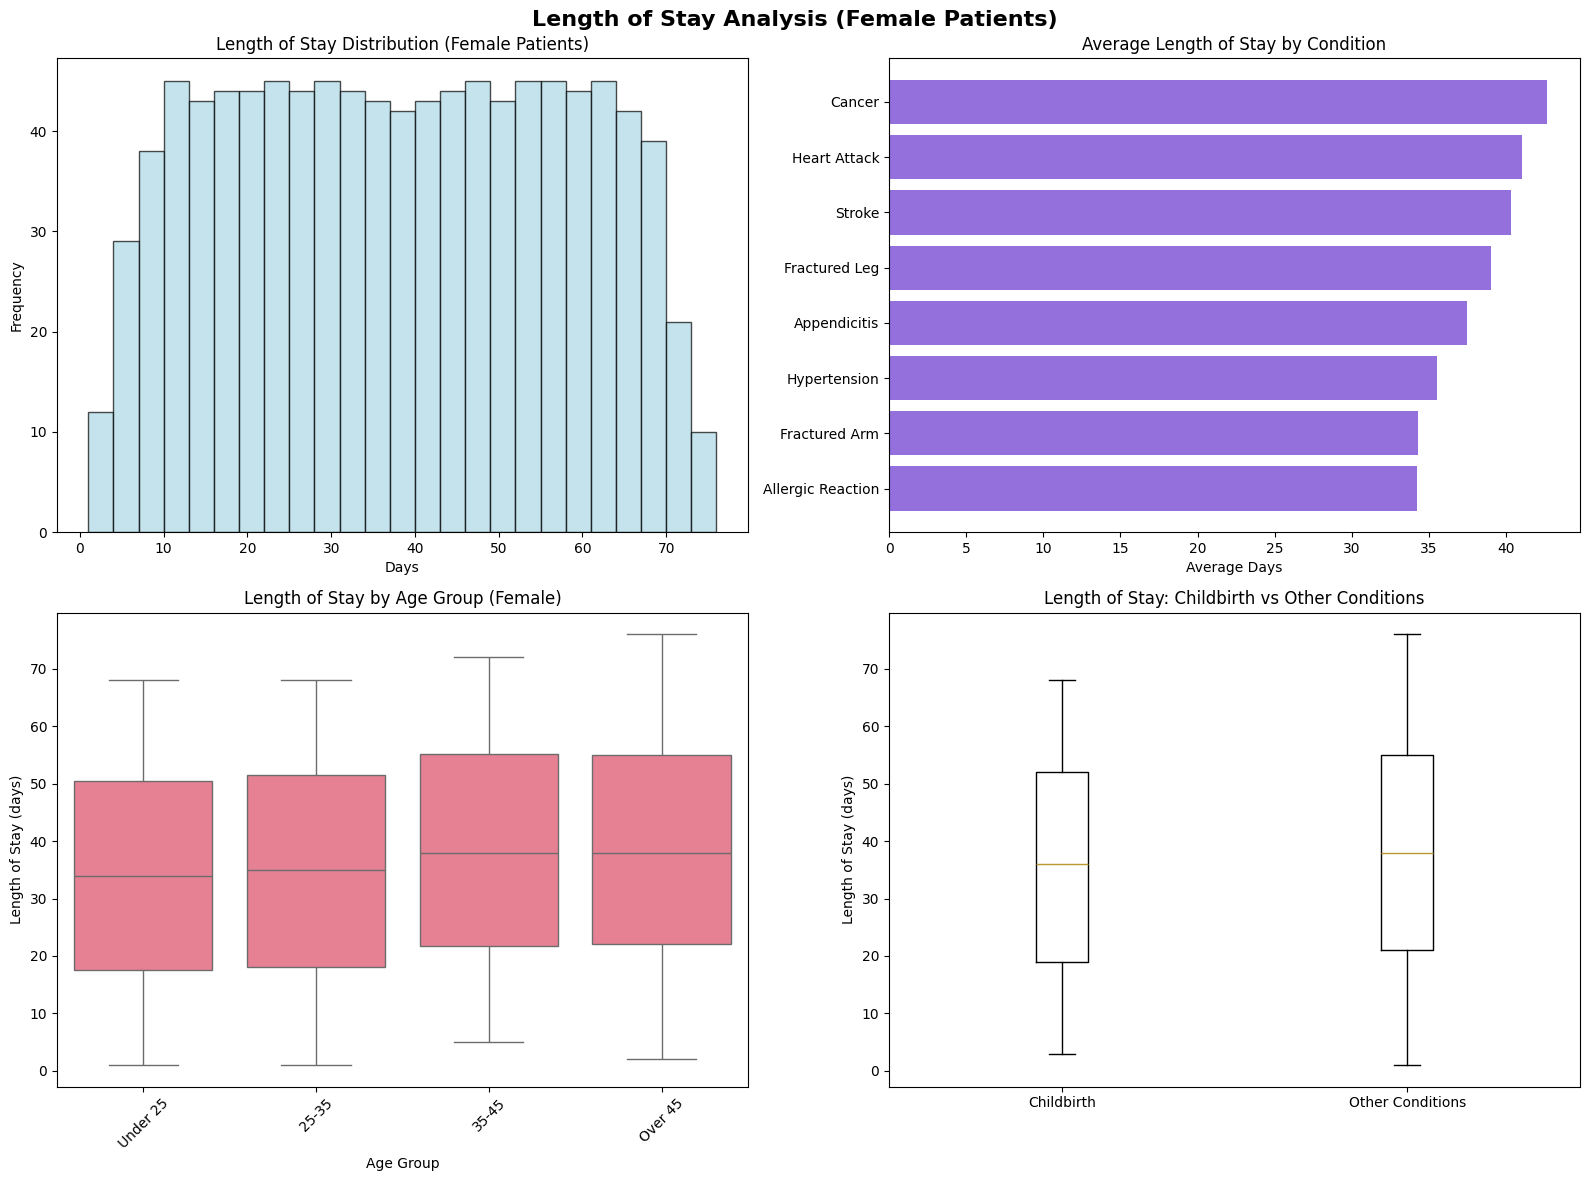

Length of Stay Statistics (Female Patients):
Average length of stay: 37.7 days
Median length of stay: 38.0 days
Stay range: 1-76 days
Average stay for childbirth: 35.5 days
Average stay for other conditions: 37.8 days


In [21]:
# Length of Stay analysis for female patients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Length of Stay Analysis (Female Patients)', fontsize=16, fontweight='bold')

# Length of stay distribution
axes[0, 0].hist(df['Length_of_Stay'], bins=25, color='lightblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Length of Stay Distribution (Female Patients)')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Frequency')

# Length of stay by condition (top 8)
top_conditions = df['Condition'].value_counts().head(8).index
los_by_condition = df[df['Condition'].isin(top_conditions)].groupby('Condition')['Length_of_Stay'].mean().sort_values(ascending=True)
axes[0, 1].barh(los_by_condition.index, los_by_condition.values, color='mediumpurple')
axes[0, 1].set_title('Average Length of Stay by Condition')
axes[0, 1].set_xlabel('Average Days')

# Length of stay by age group
sns.boxplot(data=df, x='Age_Group', y='Length_of_Stay', ax=axes[1, 0])
axes[1, 0].set_title('Length of Stay by Age Group (Female)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Length of Stay (days)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Childbirth vs other conditions length of stay
childbirth_data = df[df['Condition'].str.contains('Childbirth', case=False, na=False)]
other_data = df[~df['Condition'].str.contains('Childbirth', case=False, na=False)]

if len(childbirth_data) > 0:
    stay_comparison = pd.DataFrame({
        'Childbirth': childbirth_data['Length_of_Stay'],
        'Other Conditions': other_data['Length_of_Stay']
    })
    axes[1, 1].boxplot([childbirth_data['Length_of_Stay'].dropna(), other_data['Length_of_Stay'].dropna()], 
                      labels=['Childbirth', 'Other Conditions'])
    axes[1, 1].set_title('Length of Stay: Childbirth vs Other Conditions')
    axes[1, 1].set_ylabel('Length of Stay (days)')
else:
    axes[1, 1].text(0.5, 0.5, 'No childbirth cases\nfor comparison', 
                   ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Childbirth vs Other Conditions')

plt.tight_layout()
plt.show()

# Length of stay statistics
print("Length of Stay Statistics (Female Patients):")
print(f"Average length of stay: {df['Length_of_Stay'].mean():.1f} days")
print(f"Median length of stay: {df['Length_of_Stay'].median():.1f} days")
print(f"Stay range: {df['Length_of_Stay'].min()}-{df['Length_of_Stay'].max()} days")

if len(childbirth_data) > 0:
    print(f"Average stay for childbirth: {childbirth_data['Length_of_Stay'].mean():.1f} days")
    print(f"Average stay for other conditions: {other_data['Length_of_Stay'].mean():.1f} days")

## 5. Readmission and Outcomes Analysis

Analyzing readmission patterns and treatment outcomes for female patients.

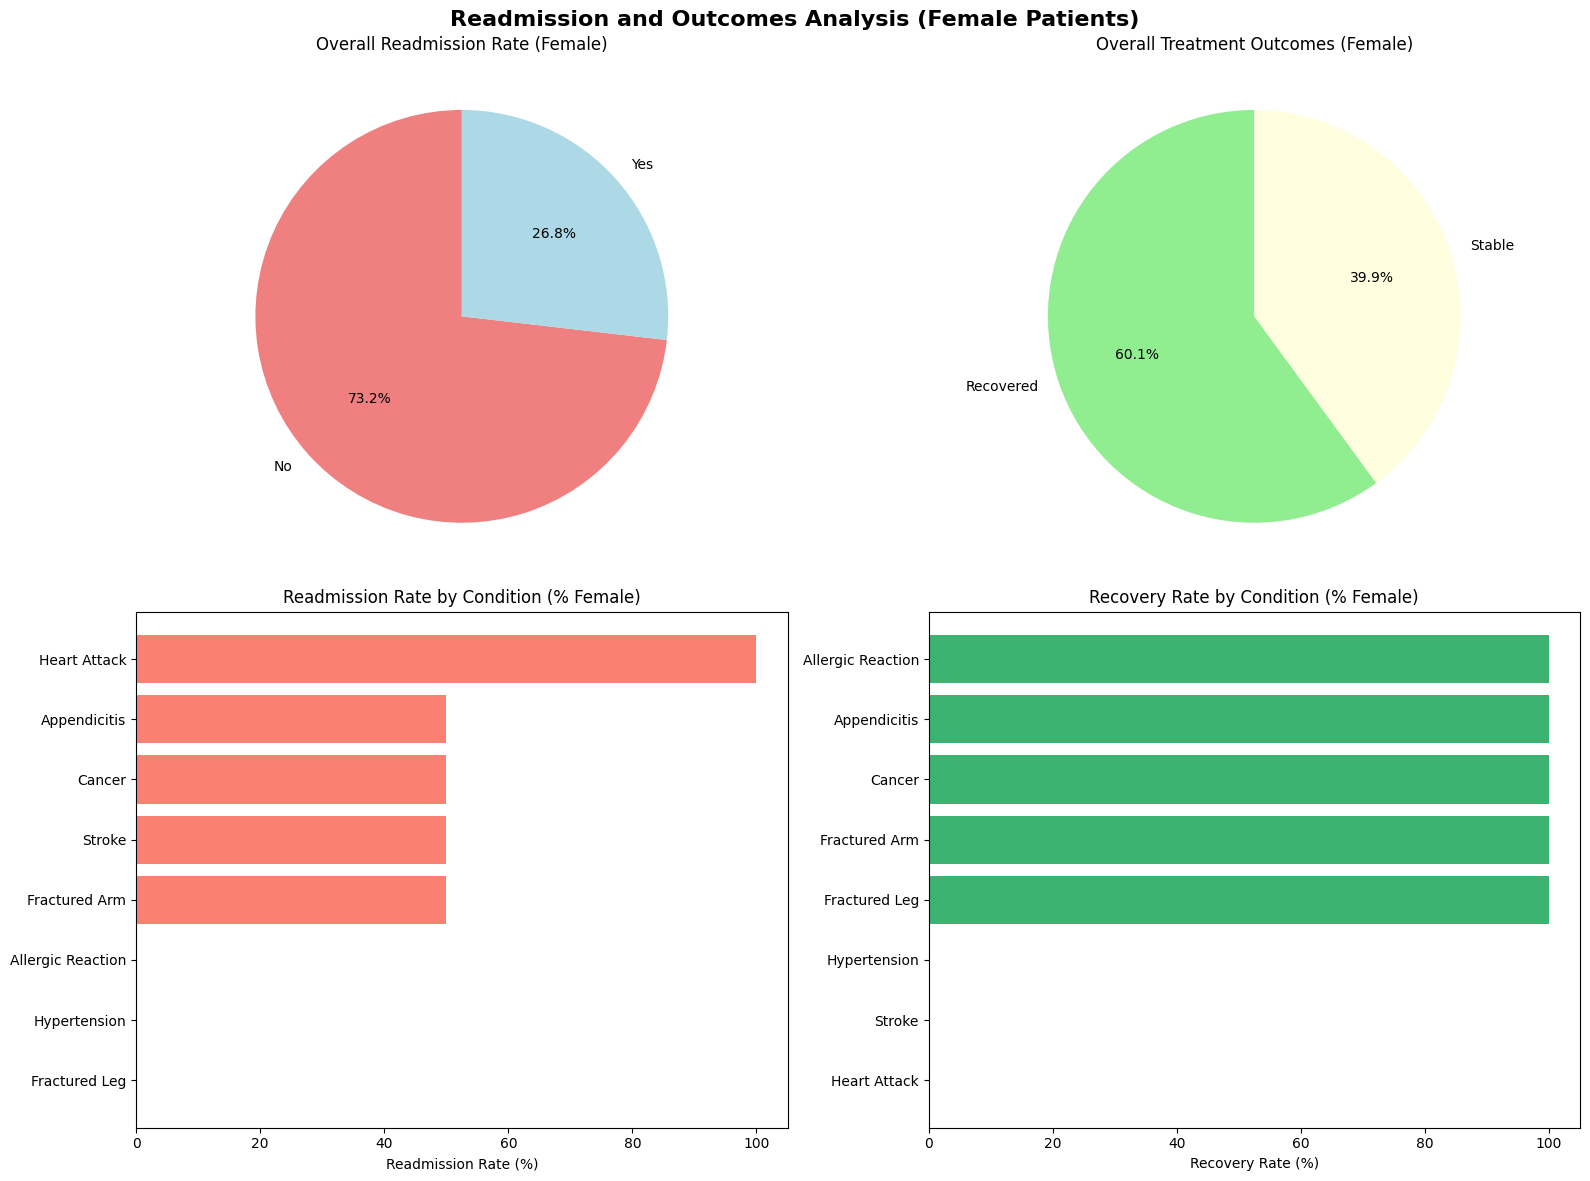

Overall readmission rate (female patients): 26.8%
Overall recovery rate (female patients): 60.1%
Childbirth readmission rate: 0.0%
Childbirth recovery rate: 100.0%


In [22]:
# Readmission and Outcomes analysis for female patients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Readmission and Outcomes Analysis (Female Patients)', fontsize=16, fontweight='bold')

# Overall readmission rate
readmission_counts = df['Readmission'].value_counts()
axes[0, 0].pie(readmission_counts.values, labels=readmission_counts.index, autopct='%1.1f%%', 
               colors=['lightcoral', 'lightblue'], startangle=90)
axes[0, 0].set_title('Overall Readmission Rate (Female)')

# Overall outcome distribution
outcome_counts = df['Outcome'].value_counts()
axes[0, 1].pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%', 
               colors=['lightgreen', 'lightyellow'], startangle=90)
axes[0, 1].set_title('Overall Treatment Outcomes (Female)')

# Readmission by condition
readmission_by_condition = pd.crosstab(df['Condition'], df['Readmission'], normalize='index') * 100
top_conditions_readmission = df['Condition'].value_counts().head(8).index
readmission_rates = readmission_by_condition.loc[top_conditions_readmission, 'Yes'].sort_values(ascending=True)
axes[1, 0].barh(readmission_rates.index, readmission_rates.values, color='salmon')
axes[1, 0].set_title('Readmission Rate by Condition (% Female)')
axes[1, 0].set_xlabel('Readmission Rate (%)')

# Recovery rates by condition
outcome_by_condition = pd.crosstab(df['Condition'], df['Outcome'], normalize='index') * 100
recovery_rates = outcome_by_condition.loc[top_conditions_readmission, 'Recovered'].sort_values(ascending=True)
axes[1, 1].barh(recovery_rates.index, recovery_rates.values, color='mediumseagreen')
axes[1, 1].set_title('Recovery Rate by Condition (% Female)')
axes[1, 1].set_xlabel('Recovery Rate (%)')

plt.tight_layout()
plt.show()

# Statistics
readmission_rate = (df['Readmission'] == 'Yes').mean() * 100
recovery_rate = (df['Outcome'] == 'Recovered').mean() * 100
print(f"Overall readmission rate (female patients): {readmission_rate:.1f}%")
print(f"Overall recovery rate (female patients): {recovery_rate:.1f}%")

# Maternity-specific statistics
childbirth_data = df[df['Condition'].str.contains('Childbirth', case=False, na=False)]
if len(childbirth_data) > 0:
    childbirth_readmission = (childbirth_data['Readmission'] == 'Yes').mean() * 100
    childbirth_recovery = (childbirth_data['Outcome'] == 'Recovered').mean() * 100
    print(f"Childbirth readmission rate: {childbirth_readmission:.1f}%")
    print(f"Childbirth recovery rate: {childbirth_recovery:.1f}%")

## 6. Patient Satisfaction Analysis

Examining patient satisfaction scores for female patients and maternity care.

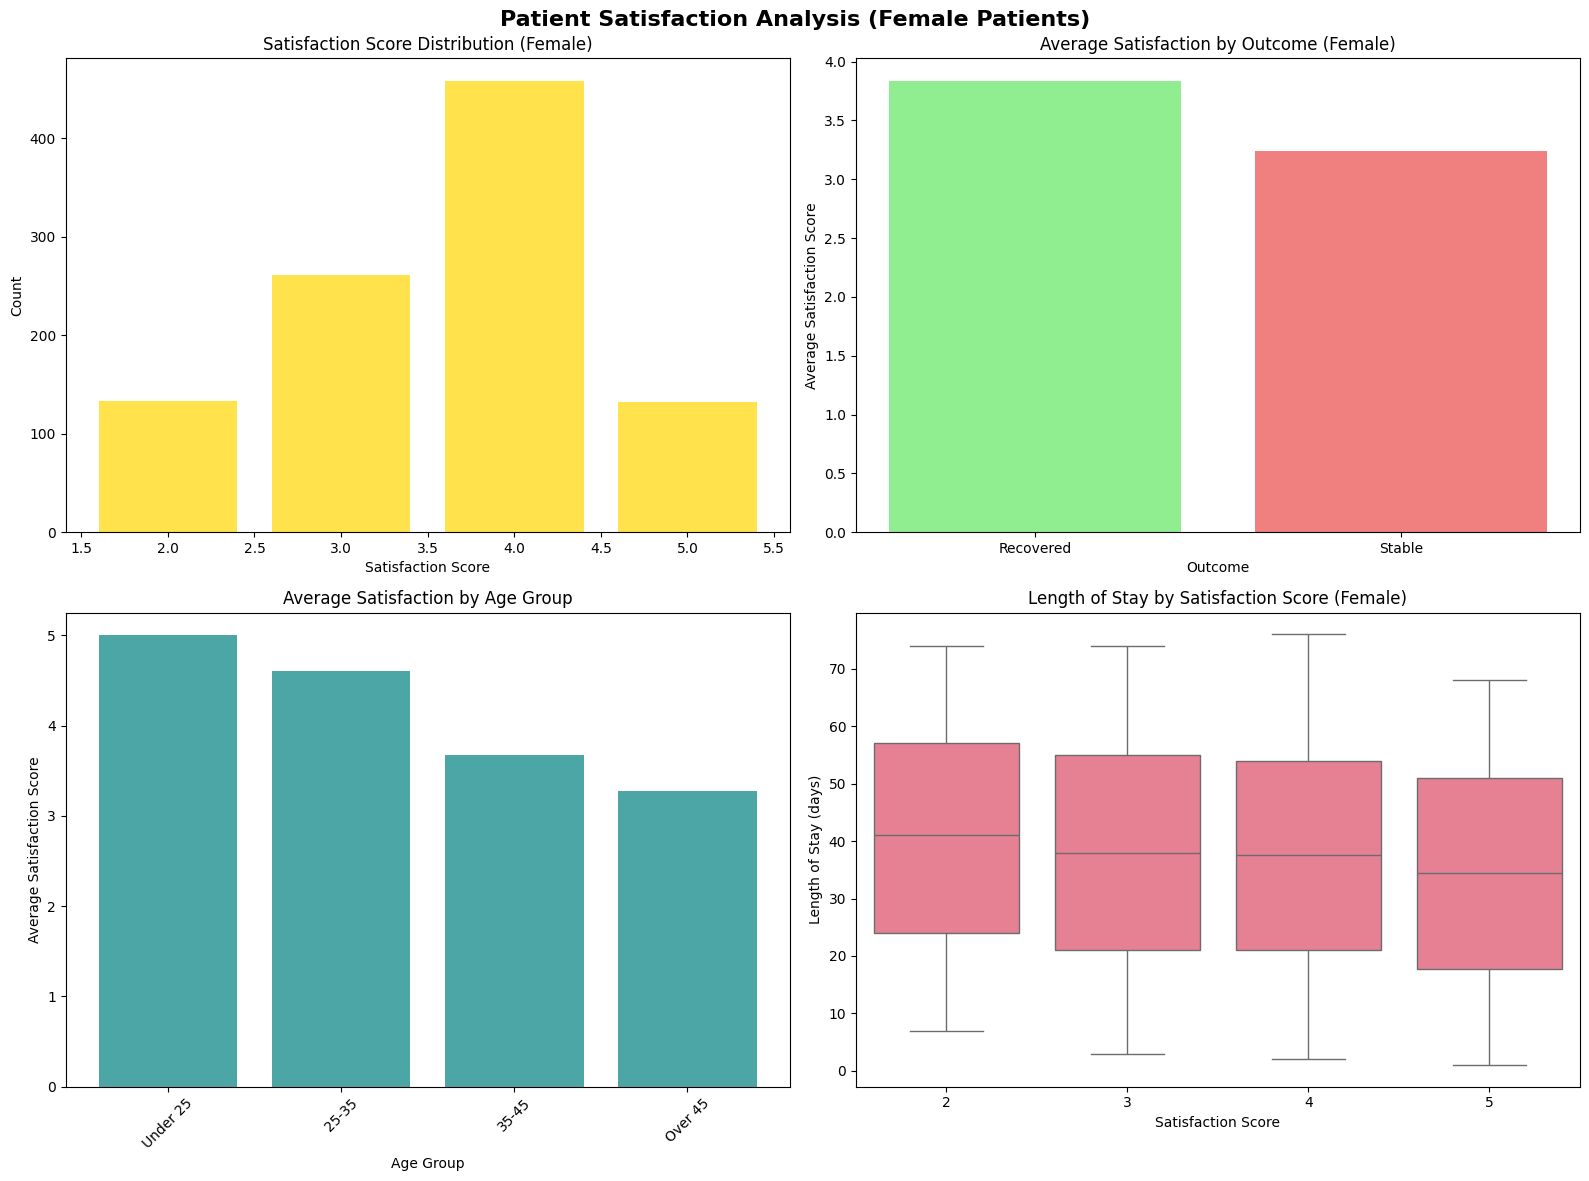

Average satisfaction (female patients): 3.60/5
Most common satisfaction score: 4/5
Average satisfaction for childbirth cases: 4.00/5


In [23]:
# Patient Satisfaction analysis for female patients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Patient Satisfaction Analysis (Female Patients)', fontsize=16, fontweight='bold')

# Satisfaction score distribution
satisfaction_counts = df['Satisfaction'].value_counts().sort_index()
axes[0, 0].bar(satisfaction_counts.index, satisfaction_counts.values, color='gold', alpha=0.7)
axes[0, 0].set_title('Satisfaction Score Distribution (Female)')
axes[0, 0].set_xlabel('Satisfaction Score')
axes[0, 0].set_ylabel('Count')

# Satisfaction by outcome
satisfaction_outcome = df.groupby('Outcome')['Satisfaction'].mean()
axes[0, 1].bar(satisfaction_outcome.index, satisfaction_outcome.values, color=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Average Satisfaction by Outcome (Female)')
axes[0, 1].set_xlabel('Outcome')
axes[0, 1].set_ylabel('Average Satisfaction Score')

# Satisfaction by age group
satisfaction_age = df.groupby('Age_Group')['Satisfaction'].mean()
axes[1, 0].bar(satisfaction_age.index, satisfaction_age.values, color='teal', alpha=0.7)
axes[1, 0].set_title('Average Satisfaction by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Average Satisfaction Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Satisfaction by length of stay
sns.boxplot(data=df, x='Satisfaction', y='Length_of_Stay', ax=axes[1, 1])
axes[1, 1].set_title('Length of Stay by Satisfaction Score (Female)')
axes[1, 1].set_xlabel('Satisfaction Score')
axes[1, 1].set_ylabel('Length of Stay (days)')

plt.tight_layout()
plt.show()

print(f"Average satisfaction (female patients): {df['Satisfaction'].mean():.2f}/5")
print(f"Most common satisfaction score: {df['Satisfaction'].mode().iloc[0]}/5")

# Maternity-specific satisfaction
childbirth_data = df[df['Condition'].str.contains('Childbirth', case=False, na=False)]
if len(childbirth_data) > 0:
    childbirth_satisfaction = childbirth_data['Satisfaction'].mean()
    print(f"Average satisfaction for childbirth cases: {childbirth_satisfaction:.2f}/5")

## 7. Correlation Analysis

Examining relationships between numerical variables.

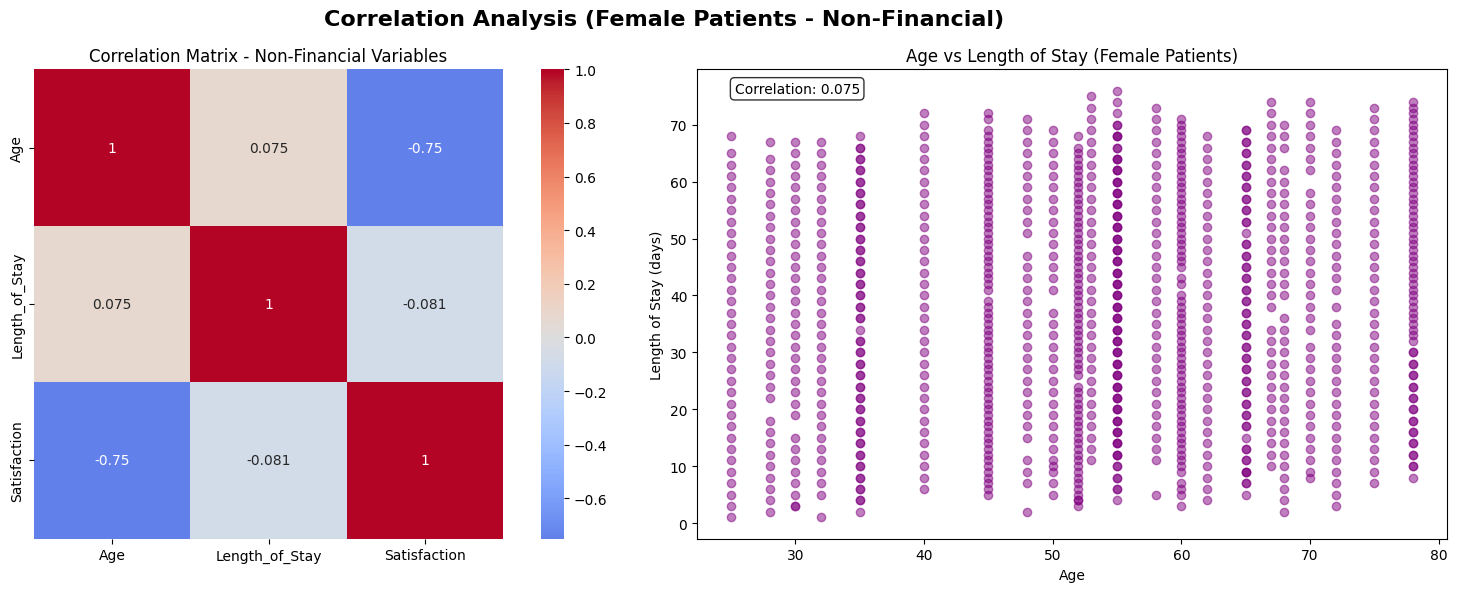

Key Correlations (Female Patients):
Age vs Length of Stay: 0.075
Age vs Satisfaction: -0.750
Length of Stay vs Satisfaction: -0.081


In [24]:
# Correlation Analysis for female patients (non-financial variables)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Analysis (Female Patients - Non-Financial)', fontsize=16, fontweight='bold')

# Select numerical columns for correlation (excluding Cost)
numerical_cols = ['Age', 'Length_of_Stay', 'Satisfaction']
corr_matrix = df[numerical_cols].corr()

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix - Non-Financial Variables')

# Age vs Length of Stay scatter
axes[1].scatter(df['Age'], df['Length_of_Stay'], alpha=0.5, color='purple')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Length of Stay (days)')
axes[1].set_title('Age vs Length of Stay (Female Patients)')

# Add correlation coefficient
corr_coef = df['Age'].corr(df['Length_of_Stay'])
axes[1].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=axes[1].transAxes,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Key correlations
print("Key Correlations (Female Patients):")
print(f"Age vs Length of Stay: {df['Age'].corr(df['Length_of_Stay']):.3f}")
print(f"Age vs Satisfaction: {df['Age'].corr(df['Satisfaction']):.3f}")
print(f"Length of Stay vs Satisfaction: {df['Length_of_Stay'].corr(df['Satisfaction']):.3f}")

## 8. Key Insights and Summary

Summarizing the main findings from our maternity-focused analysis (Female patients only).

In [25]:
# Generate comprehensive summary for maternity-focused analysis
print("=" * 80)
print("              MATERNITY-FOCUSED PATIENT RECORDS - KEY INSIGHTS")
print("                           (Female Patients Only)")
print("=" * 80)

# Dataset summary
print("\n📊 DATASET OVERVIEW:")
print(f"   • Total female patients analyzed: {len(df):,}")
print(f"   • Unique medical conditions: {df['Condition'].nunique()}")
print(f"   • Unique procedures: {df['Procedure'].nunique()}")

# Demographics insights
print("\n👩 FEMALE PATIENT DEMOGRAPHICS:")
print(f"   • Average patient age: {df['Age'].mean():.1f} years")
print(f"   • Age range: {df['Age'].min()}-{df['Age'].max()} years")
print(f"   • Most common age group: {df['Age_Group'].value_counts().index[0]}")

# Medical conditions insights
print("\n🏥 MEDICAL CONDITIONS:")
top_condition = df['Condition'].value_counts().index[0]
top_condition_count = df['Condition'].value_counts().iloc[0]
print(f"   • Most common condition: {top_condition} ({top_condition_count} cases)")
top_procedure = df['Procedure'].value_counts().index[0]
print(f"   • Most common procedure: {top_procedure}")

# Maternity-specific insights
childbirth_data = df[df['Condition'].str.contains('Childbirth', case=False, na=False)]
childbirth_cases = len(childbirth_data)
print(f"   • Childbirth/maternity cases: {childbirth_cases}")

# Length of stay insights
print("\n🏨 LENGTH OF STAY:")
print(f"   • Average length of stay: {df['Length_of_Stay'].mean():.1f} days")
print(f"   • Stay range: {df['Length_of_Stay'].min()}-{df['Length_of_Stay'].max()} days")
if childbirth_cases > 0:
    print(f"   • Average stay for childbirth: {childbirth_data['Length_of_Stay'].mean():.1f} days")

# Readmission insights
print("\n🔄 READMISSION ANALYSIS:")
readmission_rate = (df['Readmission'] == 'Yes').mean() * 100
print(f"   • Overall readmission rate (female): {readmission_rate:.1f}%")
if childbirth_cases > 0:
    childbirth_readmission = (childbirth_data['Readmission'] == 'Yes').mean() * 100
    print(f"   • Childbirth readmission rate: {childbirth_readmission:.1f}%")

# Satisfaction insights
print("\n😊 PATIENT SATISFACTION:")
print(f"   • Average satisfaction score: {df['Satisfaction'].mean():.2f}/5")
print(f"   • Most common satisfaction score: {df['Satisfaction'].mode().iloc[0]}/5")
if childbirth_cases > 0:
    childbirth_satisfaction = childbirth_data['Satisfaction'].mean()
    print(f"   • Average satisfaction for childbirth: {childbirth_satisfaction:.2f}/5")

# Outcomes insights
print("\n✅ TREATMENT OUTCOMES:")
recovery_rate = (df['Outcome'] == 'Recovered').mean() * 100
print(f"   • Overall recovery rate (female): {recovery_rate:.1f}%")
if childbirth_cases > 0:
    childbirth_recovery = (childbirth_data['Outcome'] == 'Recovered').mean() * 100
    print(f"   • Childbirth recovery rate: {childbirth_recovery:.1f}%")

# Correlations insights
print("\n🔗 KEY CORRELATIONS (Non-Financial):")
print(f"   • Age vs Length of Stay: {df['Age'].corr(df['Length_of_Stay']):.3f}")
print(f"   • Age vs Satisfaction: {df['Age'].corr(df['Satisfaction']):.3f}")
print(f"   • Length of Stay vs Satisfaction: {df['Length_of_Stay'].corr(df['Satisfaction']):.3f}")

print("\n" + "=" * 80)
print("Maternity-focused analysis completed successfully! 🎉")
print("Generated by: Gabriel Borges - COMPET CISAM")
print("Focus: Female patients only, non-financial analysis for maternity care")
print("=" * 80)

              MATERNITY-FOCUSED PATIENT RECORDS - KEY INSIGHTS
                           (Female Patients Only)

📊 DATASET OVERVIEW:
   • Total female patients analyzed: 984
   • Unique medical conditions: 15
   • Unique procedures: 15

👩 FEMALE PATIENT DEMOGRAPHICS:
   • Average patient age: 53.8 years
   • Age range: 25-78 years
   • Most common age group: Over 45

🏥 MEDICAL CONDITIONS:
   • Most common condition: Fractured Leg (67 cases)
   • Most common procedure: Cast and Physical Therapy
   • Childbirth/maternity cases: 65

🏨 LENGTH OF STAY:
   • Average length of stay: 37.7 days
   • Stay range: 1-76 days
   • Average stay for childbirth: 35.5 days

🔄 READMISSION ANALYSIS:
   • Overall readmission rate (female): 26.8%
   • Childbirth readmission rate: 0.0%

😊 PATIENT SATISFACTION:
   • Average satisfaction score: 3.60/5
   • Most common satisfaction score: 4/5
   • Average satisfaction for childbirth: 4.00/5

✅ TREATMENT OUTCOMES:
   • Overall recovery rate (female): 60.1%
   •